In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import io
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
import glob
import random

from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.time import Time
from astropy import units as u
import scipy.integrate as integrate
import lightkurve

from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

import math
import datetime as dt
import lightkurve.io as l
from lightkurve.io.generic import read_generic_lightcurve

In [11]:
# Function is created in order to eliminate characters which are not Printable ASCII characters that appear 
# from the data transfer from repository
def textcleaner(str1):
    w = str(str1).split('\n')[0]
    x = str(w)
    y = str(x.split('  ')[2])
    z = y.replace("'", "")
    return z

In [12]:
new_name = 'J1405+55'
Reference = 'Cushing et al 2016 ApJ 823 152'
Telescope = 'Spitzer Space Telescope'
Instrument = 'Infrared Array Camera (IRAC)'
Date_obs_1 = '2013-03-22'
Date_obs_2 = '2013-08-17'
Band_obs_1 = '[3.6 micron]'
Band_obs_2 = '[4.5 micron]'

In [13]:
#repository like the one we have online
general_data = pd.read_csv('/Users/kmanj/FITS_BD_Files/Repository_Data/Repository.csv', encoding ='latin1')

In [14]:
dir = '/Users/kmanj/Manjavacas Research/Cushing_2016/'
dir_save = '/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/'

In [15]:
data = pd.read_csv(dir + 'dbf1.txt', header=None, sep=' ')

In [16]:
data1 = data[data[0] == 1]
data1_3 = data1[data1[1] == 3.6]
data1_4 = data1[data1[1] == 4.5]
data2 = data[data[0] == 2]
data2_3 = data2[data2[1] == 3.6]
data2_4 = data2[data2[1] == 4.5]


#data1    -> Objects observed on March 22, 2013
#data1_3  -> Obs. 3.22.13 at [3.6]
#data1_4  -> Obs. 3.22.13 at [4.5]
#data2    -> Objects observed on August 17, 2013
#data2_3  -> Obs. 8.17.13 at [3.6]
#data2_4  -> Obs. 8.17.13 at [4.5]


In [17]:
Object = 'WISE J140518.39+553421.3'
SpectralType = 'Y0'
RA = '211.326675'
Dec = '55.572611'
Jmag = '21.06 +/- 0.06'
Hmag = '21.42 +/- 0.08'
Kmag = '21.61 +/- 0.12'

In [20]:
time_1 = list(data1_3[2])
t1 = time_1 * u.d
flux1 = list(data1_3[4]) * u.dimensionless_unscaled
eflux1 = list(data1_3[5]) * u.dimensionless_unscaled

lc = l.LightCurve(time = t1, flux = flux1, flux_err = eflux1)      

t1

<Quantity [56373.69857, 56373.69974, 56373.70091, 56373.70208, 56373.70325,
           56373.70442, 56373.70559, 56373.70676, 56373.70793, 56373.7091 ,
           56373.71027, 56373.71144, 56373.71261, 56373.71378, 56373.71495,
           56373.71612, 56373.71729, 56373.71846, 56373.71963, 56373.7208 ,
           56373.72197, 56373.72314, 56373.72431, 56373.72548, 56373.72665,
           56373.72782, 56373.72899, 56373.73016, 56373.73133, 56373.7325 ,
           56373.73367, 56373.73484, 56373.73601, 56373.73718, 56373.73835,
           56373.73952, 56373.74069, 56373.74186, 56373.74303, 56373.7442 ,
           56373.74537, 56373.74654, 56373.74771, 56373.74888, 56373.75005,
           56373.75122, 56373.75239, 56373.75356, 56373.75473, 56373.7559 ,
           56373.75707, 56373.75824, 56373.75941, 56373.76058, 56373.76175,
           56373.76292, 56373.7641 , 56373.76526, 56373.76644, 56373.7676 ,
           56373.76878, 56373.76994, 56373.77112, 56373.77228, 56373.77346,
           5

In [21]:

lc.to_fits(path = '/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_3.6_1_Cush2016.fits')        


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001E18D75FF10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E18D75CF10>]

In [22]:
with fits.open('/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_3.6_1_Cush2016.fits', mode = 'update') as f:
        f[0].header['OBJECT'] = Object
        f[0].header['SPECTYPE'] = SpectralType
        f[0].header['SPECBAND'] = Band_obs_1
        f[0].header['DATE_OBS'] = Date_obs_1
        f[0].header['TSTART'] = time_1[0]
        f[0].header['TSTOP'] = time_1[len(time_1) - 1]
        f[0].header['TIMESYS'] = 'mjd'
        f[0].header['TELESCOP'] = Telescope
        f[0].header['INSTRUME'] = Instrument
        f[0].header['FILTER'] = 'Spitzer/IRAC.I1'
        f[0].header['VOREF'] = Reference
        f[0].header['RA_OBJ'] = RA
        f[0].header['DEC_OBJ'] = Dec
        f[1].header['TUNIT1'] = 'mjd'
        f[0].header['JMAG'] = Jmag
        f[0].header['HMAG'] = Hmag
        f[0].header['KMAG'] = Kmag
        f[0].header['COMMENT'] = 'Flux is corrected for the pixel-phase effect'

<Axes: xlabel='Time', ylabel='Flux'>

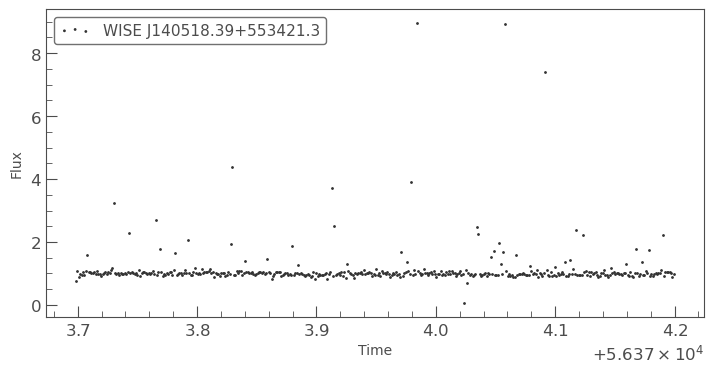

In [23]:
l2 = read_generic_lightcurve('/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_3.6_1_Cush2016.fits', time_format = 'mjd')
l2.scatter()

In [25]:
l2.time;

In [26]:
time_2 = data2_3[2]
len(time_2)

427

In [27]:
time_2 = data2_3[2]

t2 = list(time_2) * u.d
flux2 = list(data2_3[4]) * u.dimensionless_unscaled
eflux2 = list(data2_3[5]) * u.dimensionless_unscaled

lc = l.LightCurve(time = t2, flux = flux2, flux_err = eflux2)  
lc.to_fits(path = '/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_3.6_2_Cush2016.fits')            



[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001E18E5AE5C0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E18E5AEDD0>]

In [28]:
with fits.open('/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_3.6_2_Cush2016.fits', mode = 'update') as f:
        f[0].header['OBJECT'] = Object
        f[0].header['SPECTYPE'] = SpectralType
        f[0].header['SPECBAND'] = Band_obs_1
        f[0].header['DATE_OBS'] = Date_obs_2
        f[0].header['TSTART'] = list(time_2)[0]
        f[0].header['TSTOP'] = list(time_2)[len(time_2) - 1]
        f[0].header['TIMESYS'] = 'mjd'
        f[0].header['TELESCOP'] = Telescope
        f[0].header['INSTRUME'] = Instrument
        f[0].header['FILTER'] = 'Spitzer/IRAC.I1'
        f[0].header['VOREF'] = Reference
        f[0].header['RA_OBJ'] = RA
        f[0].header['DEC_OBJ'] = Dec
        f[0].header['JMAG'] = Jmag
        f[0].header['HMAG'] = Hmag
        f[0].header['KMAG'] = Kmag
        f[0].header['COMMENT'] = 'Flux is corrected for the pixel-phase effect'

<Axes: xlabel='Time', ylabel='Flux'>

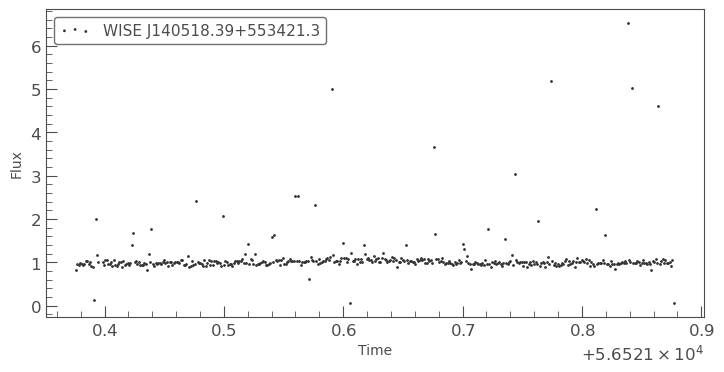

In [29]:
l2 = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_3.6_2_Cush2016.fits", time_format = 'mjd')
l2.scatter()

In [46]:
time = data1_4[2]

t3 = list(data1_4[2]) * u.d
flux3 = list(data1_4[4]) * u.dimensionless_unscaled
eflux3 = list(data1_4[5]) * u.dimensionless_unscaled

lc = l.LightCurve(time = t3, flux = flux3, flux_err = eflux3)  
lc.to_fits(path = '/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_4.5_1_Cush2016.fits')            



[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001D34C8CF8E0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001D34C84FAC0>]

In [47]:
with fits.open('/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_4.5_1_Cush2016.fits', mode = 'update') as f:
        f[0].header['OBJECT'] = Object
        f[0].header['SPECTYPE'] = SpectralType
        f[0].header['SPECBAND'] = Band_obs_2
        f[0].header['DATE_OBS'] = Date_obs_1
        f[0].header['TSTART'] = list(time)[0]
        f[0].header['TSTOP'] = list(time)[len(time) - 1]
        f[0].header['TIMESYS'] = 'mjd'
        f[1].header['TUNIT1'] = 'mjd'
        f[0].header['TELESCOP'] = Telescope
        f[0].header['INSTRUME'] = Instrument
        f[0].header['FILTER'] = 'Spitzer/IRAC.I1'
        f[0].header['VOREF'] = Reference
        f[0].header['RA_OBJ'] = RA
        f[0].header['DEC_OBJ'] = Dec
        f[0].header['JMAG'] = Jmag
        f[0].header['HMAG'] = Hmag
        f[0].header['KMAG'] = Kmag
        f[0].header['COMMENT'] = 'Flux is corrected for the pixel-phase effect'
 

In [48]:
time = data2_4[2]

t4 = list(time) * u.d
flux4 = list(data2_4[4]) * u.dimensionless_unscaled
eflux4 = list(data2_4[5]) * u.dimensionless_unscaled

lc = l.LightCurve(time = t4, flux = flux4, flux_err = eflux4)  
lc.to_fits(path = '/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_4.5_2_Cush2016.fits')               



[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001D34B5F7250>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001D34B5FB4C0>]

In [49]:
with fits.open('/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_4.5_2_Cush2016.fits', mode = 'update') as f:
        f[0].header['OBJECT'] = Object
        f[0].header['SPECTYPE'] = SpectralType
        f[0].header['SPECBAND'] = Band_obs_2
        f[0].header['DATE_OBS'] = Date_obs_2
        f[0].header['TSTART'] = list(time)[0]
        f[0].header['TSTOP'] = list(time)[len(time) - 1]
        f[0].header['TIMESYS'] = 'mjd'
        f[1].header['TUNIT1'] = 'mjd'
        f[0].header['TELESCOP'] = Telescope
        f[0].header['INSTRUME'] = Instrument
        f[0].header['FILTER'] = 'Spitzer/IRAC.I1'
        f[0].header['VOREF'] = Reference
        f[0].header['RA_OBJ'] = RA
        f[0].header['DEC_OBJ'] = Dec
        f[0].header['JMAG'] = Jmag
        f[0].header['HMAG'] = Hmag
        f[0].header['KMAG'] = Kmag
        f[0].header['COMMENT'] = 'Flux is corrected for the pixel-phase effect'
 

In [61]:
lc1 = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_3.6_1_Cush2016.fits", time_format = 'mjd')
lc2 = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_3.6_2_Cush2016.fits", time_format = 'mjd')
lc3 = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_4.5_1_Cush2016.fits", time_format = 'mjd')
lc4 = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Cushing_2016/WISE_J140518.39+553421.3_4.5_2_Cush2016.fits", time_format = 'mjd')

<Axes: xlabel='Time', ylabel='Flux'>

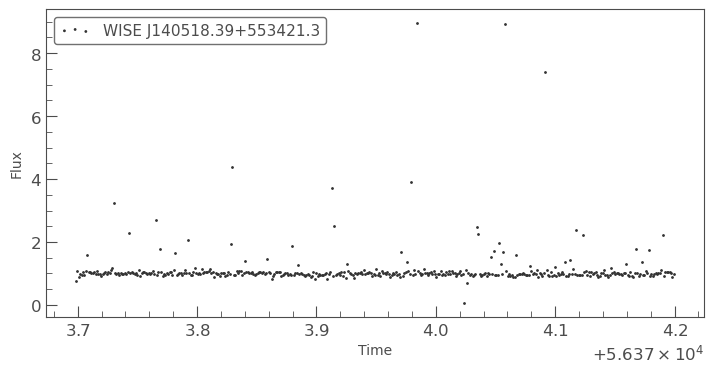

In [64]:
lc1.scatter()

<Axes: xlabel='Time', ylabel='Flux'>

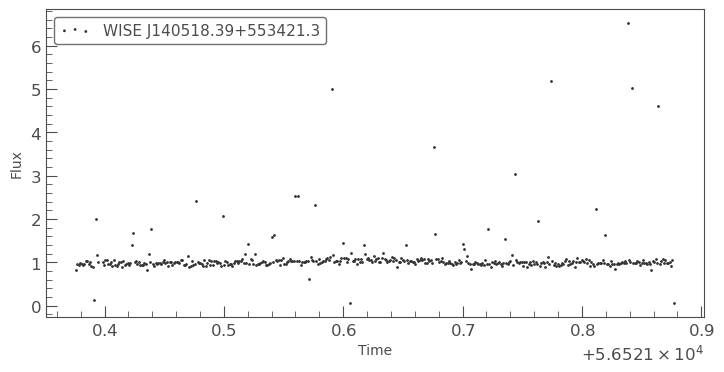

In [65]:
lc2.scatter()

<Axes: xlabel='Time', ylabel='Flux'>

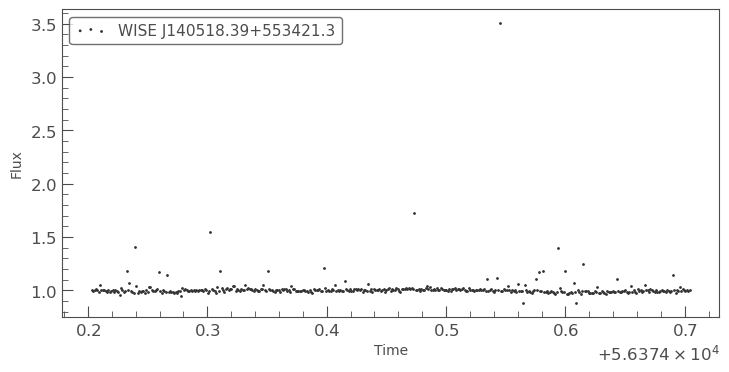

In [66]:
lc3.scatter()

<Axes: xlabel='Time', ylabel='Flux'>

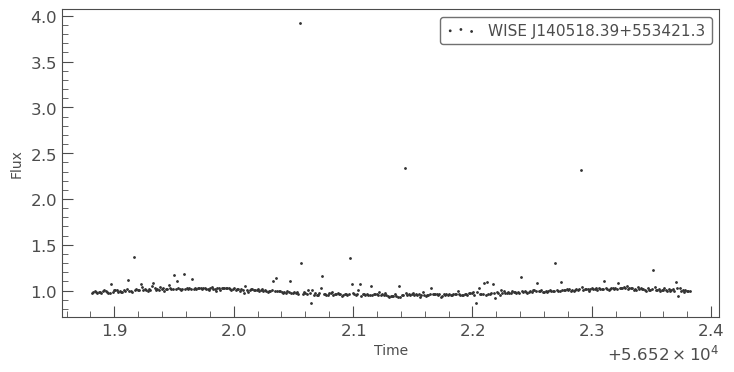

In [67]:
lc4.scatter()